# Stock and Revenue Analysis
This notebook extracts stock and revenue data for Tesla and GameStop, visualizes the data, and builds dashboards.
## Steps:
1. Extract Tesla stock data
2. Extract Tesla revenue data
3. Extract GameStop stock data
4. Extract GameStop revenue data
5. Build Tesla dashboard
6. Build GameStop dashboard


In [1]:
!pip install yfinance pandas beautifulsoup4 requests matplotlib


[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: C:\Users\mriga\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt


## Question 1: Extracting Tesla Stock Data Using yfinance

In [3]:
tesla = yf.Ticker('TSLA')
tesla_data = tesla.history(period='max')
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2: Extracting Tesla Revenue Data Using Webscraping

In [16]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {"User-Agent": "Mozilla/5.0"}
html_data = requests.get(url, headers=headers).text
soup = BeautifulSoup(html_data, "html.parser")
tables = soup.find_all("table")
print(f"Number of tables found: {len(tables)}")
if len(tables) > 0:
    try:
        tesla_revenue = pd.read_html(str(tables[0]))[0]
        tesla_revenue.columns = ["Date", "Revenue"]
        tesla_revenue.dropna(inplace=True)
        tesla_revenue["Revenue"] = tesla_revenue["Revenue"].replace(r'\$', '', regex=True).replace(',', '', regex=True).astype(float)
        
        print(tesla_revenue.tail())
    except Exception as e:
        print(f"Error reading the table: {e}")
else:
    print("No tables found. The website structure may have changed.")


Number of tables found: 6
    Date  Revenue
10  2013   2013.0
11  2012    413.0
12  2011    204.0
13  2010    117.0
14  2009    112.0


C:\Users\mriga\AppData\Local\Temp\ipykernel_20864\1499133882.py:9: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tesla_revenue = pd.read_html(str(tables[0]))[0]


## Question 3: Extracting GameStop Stock Data Using yfinance

In [11]:
gme = yf.Ticker('GME')
gme_data = gme.history(period='max')
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712708,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4: Extracting GameStop Revenue Data Using Webscraping

In [17]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {"User-Agent": "Mozilla/5.0"}
html_data = requests.get(url, headers=headers).text
soup = BeautifulSoup(html_data, "html.parser")
tables = soup.find_all("table")
print(f"Number of tables found: {len(tables)}")
if len(tables) > 0:
    try:
        gme_revenue = pd.read_html(str(tables[0]))[0]
        gme_revenue.columns = ["Date", "Revenue"]
        gme_revenue.dropna(inplace=True)
        gme_revenue["Revenue"] = gme_revenue["Revenue"].replace(r'\$', '', regex=True).replace(',', '', regex=True).astype(float)
        print(gme_revenue.tail())
    except Exception as e:
        print(f"Error reading the table: {e}")
else:
    print("No tables found. The website structure may have changed.")


Number of tables found: 6
    Date  Revenue
11  2013   8887.0
12  2012   9551.0
13  2011   9474.0
14  2010   9078.0
15  2009   8806.0


C:\Users\mriga\AppData\Local\Temp\ipykernel_20864\3417181218.py:12: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  gme_revenue = pd.read_html(str(tables[0]))[0]


## Question 5: Tesla Stock and Revenue Dashboard

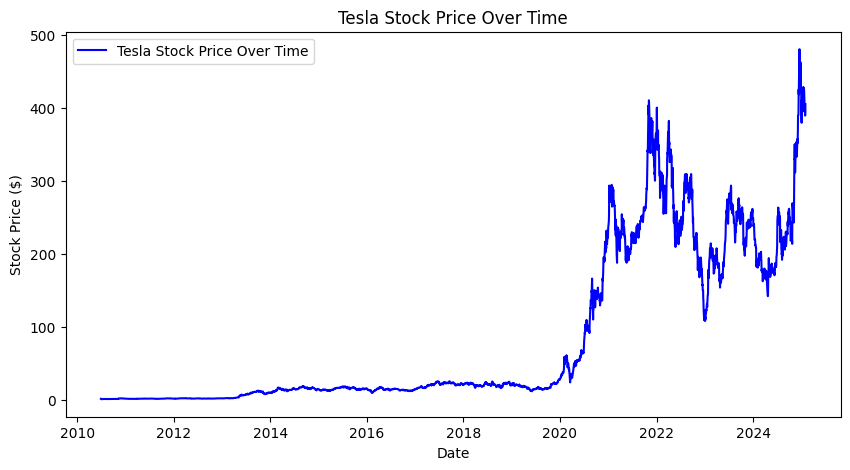

In [13]:
def make_graph(data, title):
    plt.figure(figsize=(10, 5))
    plt.plot(data['Date'], data['Close'], label=title, color='blue')
    plt.xlabel('Date')
    plt.ylabel('Stock Price ($)')
    plt.title(title)
    plt.legend()
    plt.show()

make_graph(tesla_data, 'Tesla Stock Price Over Time')

## Question 6: GameStop Stock and Revenue Dashboard

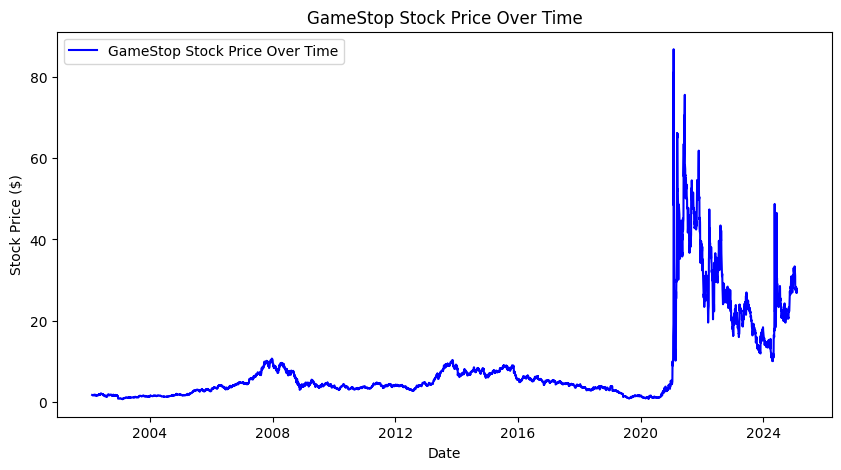

In [14]:
make_graph(gme_data, 'GameStop Stock Price Over Time')